# Classification with Gradient Descent

We haven't touched classification (*coming up in the next days*) yet, but we can use ```Gradient Descent``` also for classification. In this notebook you can have a look on how to do it and can come back to it later to compare it with the other methods. We will also use this example to visualize SGD and Mini-Batch GD.

## Visualisation of Stochastic Gradient Descent (SGD) and Mini Batch Gradient Descent
Now we are looking at examples for the visualisation of the Stochastic Gradient Descent (SGD) and the Mini Batch Gradient Descent using the scikit-learn ```sklearn.linear_model.SGDClassifier()```. First we are loading the digits dataset which consists of 8x8 images of a digit.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import numpy as np

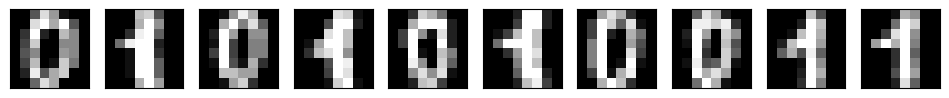

In [2]:
# Load the digits dataset with two classes
digits, target = dt.load_digits(n_class=2, return_X_y=True)
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4), subplot_kw=dict(xticks=[], yticks=[]))

# Plot some images of digits
for i in np.arange(10):
    ax[i].imshow(digits[i,:].reshape(8,8), cmap=plt.cm.gray)   
plt.show()

The above images shows 10 boxes with the black backgound and some white and grey pixels in it which shows a very blurry images of respectivly from left to right 0,1,0,1,0,1,0,0,1,1

Now we are splitting the dataset into train- and test set.

In [3]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
                        digits, target, test_size=0.2, random_state=10)

## Visualisation of Stochastic Gradient Descent (SGD)

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import sys
from io import StringIO
import matplotlib.pyplot as plt

/home/parvin/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


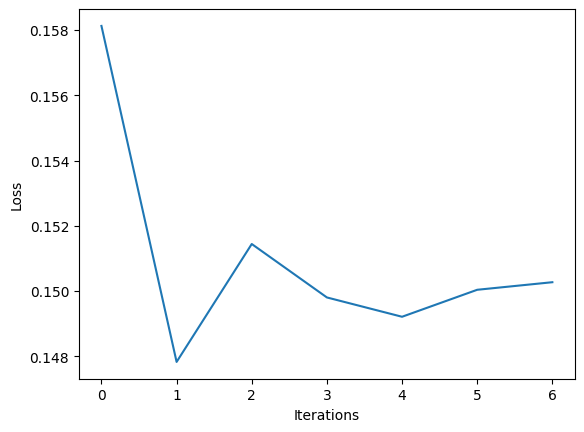

In [5]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

# You can look up the documentation and play with the hyperparameters
clf = SGDClassifier(loss='log', penalty="l1", alpha= 0.1, verbose=1, n_jobs=-1, random_state=10)
clf.fit(X_train_sc, y_train)

# Plotting the loss function
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

The above plot depict the loss as vertical axis ranging between 0.147 to 0.159 and the iteration as horizontal axis ranging between 0 and 6. The blue line starts at loss = 0.158 and drops like a straight line to loss = 0.148 at iteration = 1 then increase to loss = 0.151 at itteration 2 then decrease to loss = 0.150 at 3 continue to decrease to loss = 0.149 at 4 then increase to slightly loss > 0.150 at 5 and continue to slightly more increasing but still very near to the 0.150

In [6]:
accuracy = clf.score(X_test_sc, y_test)
print(f"Accuracy: {accuracy.round(2)}")

Accuracy: 0.97


You can see with the SGD the model gets better pretty fast. And an accuracy of 97%.

## Visualisation of Mini Batch Gradient Descent

/home/parvin/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


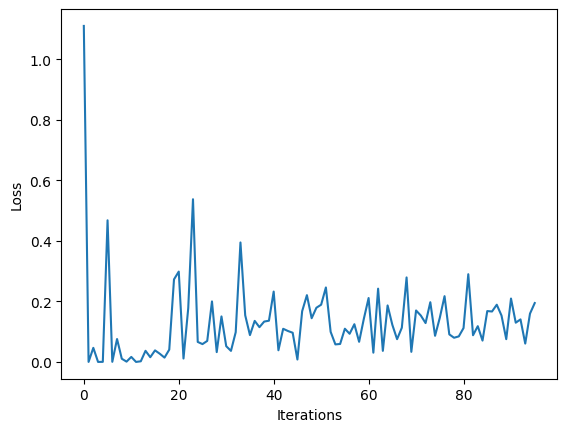

In [7]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

# You can look up the documentation and play with the hyperparameters
clf = SGDClassifier(loss='log', penalty="l1", alpha= 0.1, verbose=1, n_jobs=-1, random_state=10)



# creating the batches N = 6 (the shape of X_train is 288,64) 
# you can also change the number of batches (keep the shape of X_train in mind)
X_train_splits = np.array_split(X_train_sc, 96)
y_train_splits = np.array_split(y_train, 96)

# training the model on those minibatches
for X_train_split, y_train_split in zip(X_train_splits, y_train_splits):
    clf.partial_fit(X_train_split, y_train_split, classes= np.unique([1,0]))

# Plotting the loss function
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

The above plot depict the loss as vertical axis ranging between 0 to 1.2 and the iteration as horizontal axis ranging between 0 and 100. The blue line starts at loss = 1.1 at iteration = 0 and drops like a straight line to loss value of almost zero at iteration = 1 then it shows a noisy variation between loss of zero and 0.4 which slightly tends to become less noisy after iteration = 60 but increasing in the loss value to about 0.1

In [ ]:
accuracy = clf.score(X_test_sc, y_test)
print(f"Accuracy: {accuracy.round(2)}")

In comparison to the SGD you can see here that the Mini Batch GD needs seemingly more iterations to get to an similar result of 94% accuracy. But that is due to the lack of early stopping (where the model stops fitting if the loss function doesn't get better) with ```partial_fit()```.